In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)

In [3]:
path_training = "/home/murillor/projects/analysis2/trainingSets"
train_classes = ["neut", "linkedSoft", "linkedHard", "soft", "hard"]

In [4]:
dfs = []
class_dict = {"neut":"disc_neut", "linkedSoft":"disc_lsoft", "linkedHard":"disc_lhard", "soft":"disc_soft", "hard":"disc_hard"}
for train_class in train_classes:
    df = pd.read_csv(f'{path_training}/{train_class}.fvec', sep="\t")
    df["class"] = class_dict[train_class]
    dfs.append(df)

In [5]:
training = pd.concat(dfs)

In [6]:
training.columns

Index(['pi_win0', 'pi_win1', 'pi_win2', 'pi_win3', 'pi_win4', 'pi_win5',
       'pi_win6', 'pi_win7', 'pi_win8', 'pi_win9',
       ...
       'distKurt_win2', 'distKurt_win3', 'distKurt_win4', 'distKurt_win5',
       'distKurt_win6', 'distKurt_win7', 'distKurt_win8', 'distKurt_win9',
       'distKurt_win10', 'class'],
      dtype='object', length=166)

In [7]:
path_sims = "/home/murillor/projects/analysis2/results/simulated_data/sweeps"
sim_classes = {"bgs":"popsim_bgs","sweep":"popsim_hard","neutral":"popsim_neut"}
dfs=[]
for sim_class in sim_classes.keys():
    df = pd.read_csv(f'{path_sims}/{sim_class}.fv', sep="\t", header=None)
    df["class"] = sim_classes[sim_class]
    dfs.append(df)

FileNotFoundError: [Errno 2] No such file or directory: '/home/murillor/projects/analysis2/results/simulated_data/sweeps/bgs.fv'

In [ ]:
sims = pd.concat(dfs)
sims = sims[sims.iloc[:,3] == "1600001-3800000"] # just keeping where the sweep happens
sims = sims.iloc[: , 4:] # removing first four columns
sims.columns = training.columns

In [8]:
from sklearn.decomposition import PCA

In [10]:
sims.shape

(79999, 166)

In [11]:
training.shape

(10000, 166)

In [14]:
def pca_and_plot(sims, training, filter_classes=None, frac_sims=0.12, alpha=0.3):
    pca = PCA()
    sample = sims.sample(frac=frac_sims)
    sample["class"] = sample["class"]
    df = pd.concat([sample,training])
    if filter_classes is not None:
        df = df[df["class"].isin(filter_classes)]
    Xt = pca.fit_transform(df.iloc[:,:-1])
    classes = pd.Categorical(df.iloc[:,-1])
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=classes.codes, alpha=0.1)
    plt.legend(handles=plot.legend_elements()[0], labels=classes.categories.to_list())
    plt.show()

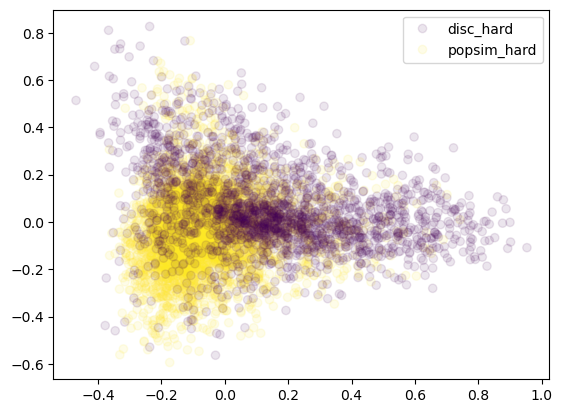

In [15]:
pca_and_plot(sims, training, ["disc_hard","popsim_hard"])

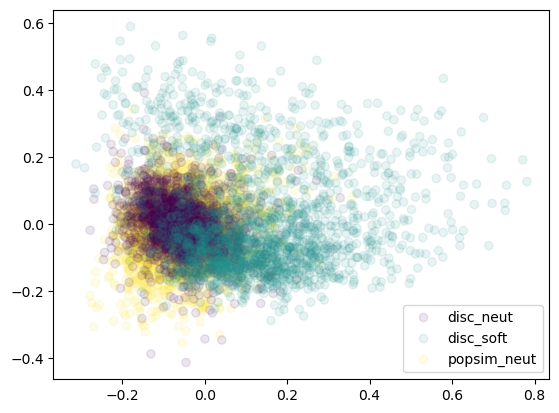

In [29]:
pca_and_plot(sims, training, ["disc_soft", "disc_neut", "popsim_neut"])

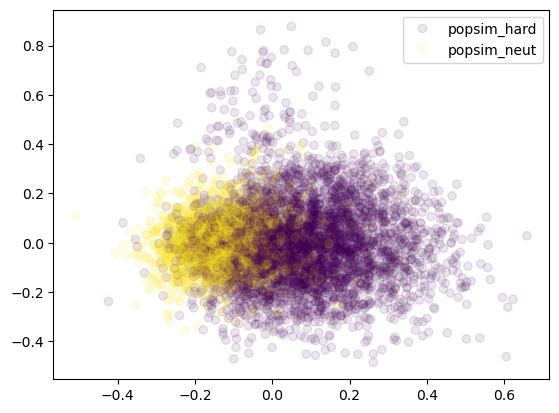

In [18]:
pca_and_plot(sims, training, ["popsim_hard","popsim_neut"])

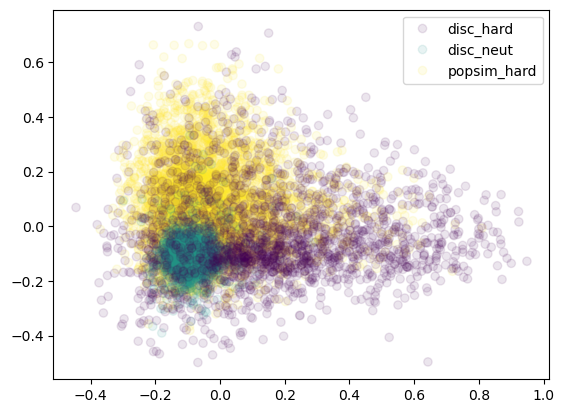

In [25]:
pca_and_plot(sims, training, ["disc_hard","disc_neut", "popsim_hard"])